In [ ]:


#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

# load the data
#path =r"C:\Users\305197\OneDrive - Petco Animal Supplies\OneDrive-2019-03-29\oil_exxon.xlsx"
#path = 'C:\\Users\\Instructor\\Documents\\python\\monet.csv'
#df_price_data = pd.read_csv(path)
#df_bonus = pd.read_csv(path)
# set the index equal to the date column & then drop the old date column
#price_data.index = pd.to_datetime(price_data['date'])
#price_data = price_data.drop(['date'], axis = 1)

# print the first five rows
#price_data.head()


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1gsDGrYxtlUc_4ACu08LGEeQI1trRm8jH'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 

downloaded = drive.CreateFile({'id':'108B38hkg_c9VXcFuIky7EUmm0cy_I9eW'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tune.csv') 

In [ ]:
df = pd.read_csv('train.csv',error_bad_lines=False) 
df['DateTime'] = pd.to_datetime(df['date'])
df

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,DateTime,time,day,month,season,crimes_per_year,prev_crimes_per_year,primary_type_grouped
0,6392722,HP478060,2008-07-27,023XX W SHAKESPEARE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1432,14.0,32.0,22.0,08B,1160224.0,1914327.0,2008,2018-02-28 15:56:25+00:00,41.920619,-87.686729,"(41.9206194, -87.686728902)",2008-07-27,16:30:00,27,7,summer,2392,28969,NON-CRIMINAL_ASSAULT
1,1350624,G052587,2001-01-25,078XX S PHILLIPS AV,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,421,4.0,28.0,25.0,05,1193844.0,1853629.0,2001,2015-08-17 15:03:40+00:00,41.753300,-87.565199,"(41.753299674, -87.565198735)",2001-01-25,22:28:20,25,1,winter,1301,28969,THEFT
2,1533391,G284183,2001-05-16,080XX S PERRY AV,0810,THEFT,OVER $500,STREET,False,False,623,6.0,24.0,25.0,06,1176964.0,1851707.0,2001,2015-08-17 15:03:40+00:00,41.748422,-87.627115,"(41.748422385, -87.627114813)",2001-05-16,19:00:00,16,5,spring,5006,28969,THEFT
3,4434007,HL729658,2005-11-11,032XX W 48TH PL,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,821,8.0,14.0,58.0,06,1155534.0,1872408.0,2005,2018-02-28 15:56:25+00:00,41.805685,-87.705088,"(41.805684869, -87.705088055)",2005-11-11,15:00:00,11,11,fall,5823,28969,THEFT
4,2290743,HH576045,2002-08-12,013XX W 76TH ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,612,6.0,17.0,71.0,05,1168761.0,1854390.0,2002,2018-02-28 15:56:25+00:00,41.755966,-87.657096,"(41.755965725, -87.65709614)",2002-08-12,06:00:00,12,8,summer,1310,28969,THEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352576,5729277,HN538389,2007-08-19,026XX E 74TH ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,334,3.0,7.0,43.0,08A,1194873.0,1856476.0,2007,2018-02-28 15:56:25+00:00,41.761087,-87.561334,"(41.761086784, -87.56133429)",2007-08-19,15:00:00,19,8,summer,1549,28969,NON-CRIMINAL_ASSAULT
352577,6122276,HP215310,2008-03-09,012XX S CALIFORNIA BLVD,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,False,False,1023,10.0,28.0,29.0,04A,1157888.0,1894096.0,2008,2018-02-28 15:56:25+00:00,41.865152,-87.695864,"(41.865151741, -87.695864118)",2008-03-09,01:15:00,9,3,spring,1176,28969,NON-CRIMINAL_ASSAULT
352578,1811814,G639162,2001-10-23,074XX W TALCOTT AV,0560,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,False,1612,16.0,24.0,25.0,08A,1125714.0,1938856.0,2001,2015-08-17 15:03:40+00:00,41.988574,-87.812981,"(41.988573865, -87.812980647)",2001-10-23,22:30:00,23,10,fall,876,28969,NON-CRIMINAL_ASSAULT
352579,8118017,HT352665,2011-06-01,089XX S BALTIMORE AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,424,4.0,10.0,46.0,26,1198449.0,1846248.0,2011,2018-02-10 15:50:01+00:00,41.732932,-87.548570,"(41.732931607, -87.548570191)",2011-06-01,18:30:00,1,6,summer,1269,28969,OTHER_OFFENSE


In [ ]:
print(df['district'])


0         14.0
1          4.0
2          6.0
3          8.0
4          6.0
          ... 
352576     3.0
352577    10.0
352578    16.0
352579     4.0
352580    10.0
Name: district, Length: 352581, dtype: float64


In [ ]:
df[['D1','Updated_duration']] = df.updated_on.str.split(expand=True) 


In [ ]:
df.drop(['case_number','updated_on','year', 'fbi_code', 'beat','ward','community_area', 'location', 'D1'], inplace=True, axis=1)

In [ ]:
df.dtypes

unique_key                       int64
date                            object
block                           object
iucr                            object
primary_type                    object
description                     object
location_description            object
arrest                            bool
domestic                          bool
district                       float64
x_coordinate                   float64
y_coordinate                   float64
latitude                       float64
longitude                      float64
DateTime                datetime64[ns]
time                            object
day                              int64
month                            int64
season                          object
crimes_per_year                  int64
prev_crimes_per_year             int64
primary_type_grouped            object
Updated_duration                object
dtype: object

In [ ]:
df['date'] = df['DateTime'].dt.date
df['time'] = df['DateTime'].dt.time


In [ ]:
df['day'] = df['DateTime'].dt.day
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year


In [ ]:
df1 = df[["unique_key", "date", 'month', 'day', 'year', "time","DateTime","primary_type", "domestic", "arrest", 'Updated_duration', 'district']]
df1

,unique_key,date,month,day,year,time,DateTime,primary_type,domestic,arrest,Updated_duration,district
0,6392722,2008-07-27,7,27,2008,00:00:00,2008-07-27,BATTERY,True,False,15:56:25+00:00,14.0
1,1350624,2001-01-25,1,25,2001,00:00:00,2001-01-25,BURGLARY,False,False,15:03:40+00:00,4.0
2,1533391,2001-05-16,5,16,2001,00:00:00,2001-05-16,THEFT,False,False,15:03:40+00:00,6.0
3,4434007,2005-11-11,11,11,2005,00:00:00,2005-11-11,THEFT,False,False,15:56:25+00:00,8.0
4,2290743,2002-08-12,8,12,2002,00:00:00,2002-08-12,BURGLARY,False,False,15:56:25+00:00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
352576,5729277,2007-08-19,8,19,2007,00:00:00,2007-08-19,ASSAULT,True,False,15:56:25+00:00,3.0
352577,6122276,2008-03-09,3,9,2008,00:00:00,2008-03-09,ASSAULT,False,False,15:56:25+00:00,10.0
352578,1811814,2001-10-23,10,23,2001,00:00:00,2001-10-23,ASSAULT,False,False,15:03:40+00:00,16.0
352579,8118017,2011-06-01,6,1,2011,00:00:00,2011-06-01,OTHER OFFENSE,True,False,15:50:01+00:00,4.0


In [ ]:
# convert dates to pandas datetime format
df1.Date = pd.to_datetime(df1.date, format='%Y/%m/%d')
# setting the index to be the date will help us a lot later on
df1.index = pd.DatetimeIndex(df1.Date)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
#loc_to_change  = list(df1['location_description'].value_counts()[20:].index)
#desc_to_change = list(df1['description'].value_counts()[20:].index)
#type_to_change = list(df1['primary_type'].value_counts()[20:].index)

#df1.loc[df1['location_description'].isin(loc_to_change) , df1.columns=='location_description'] = 'OTHER'
#df1.loc[df1['description'].isin(desc_to_change) , df1.columns=='description'] = 'OTHER'
#df1.loc[df1['primary_type'].isin(type_to_change) , df1.columns=='primary_type'] = 'OTHER'

In [ ]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
df1['primary_type']         = pd.Categorical(df1['primary_type'])
#df1['location_description'] = pd.Categorical(df1['location_description'])
#df1['description']          = pd.Categorical(df1['description'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


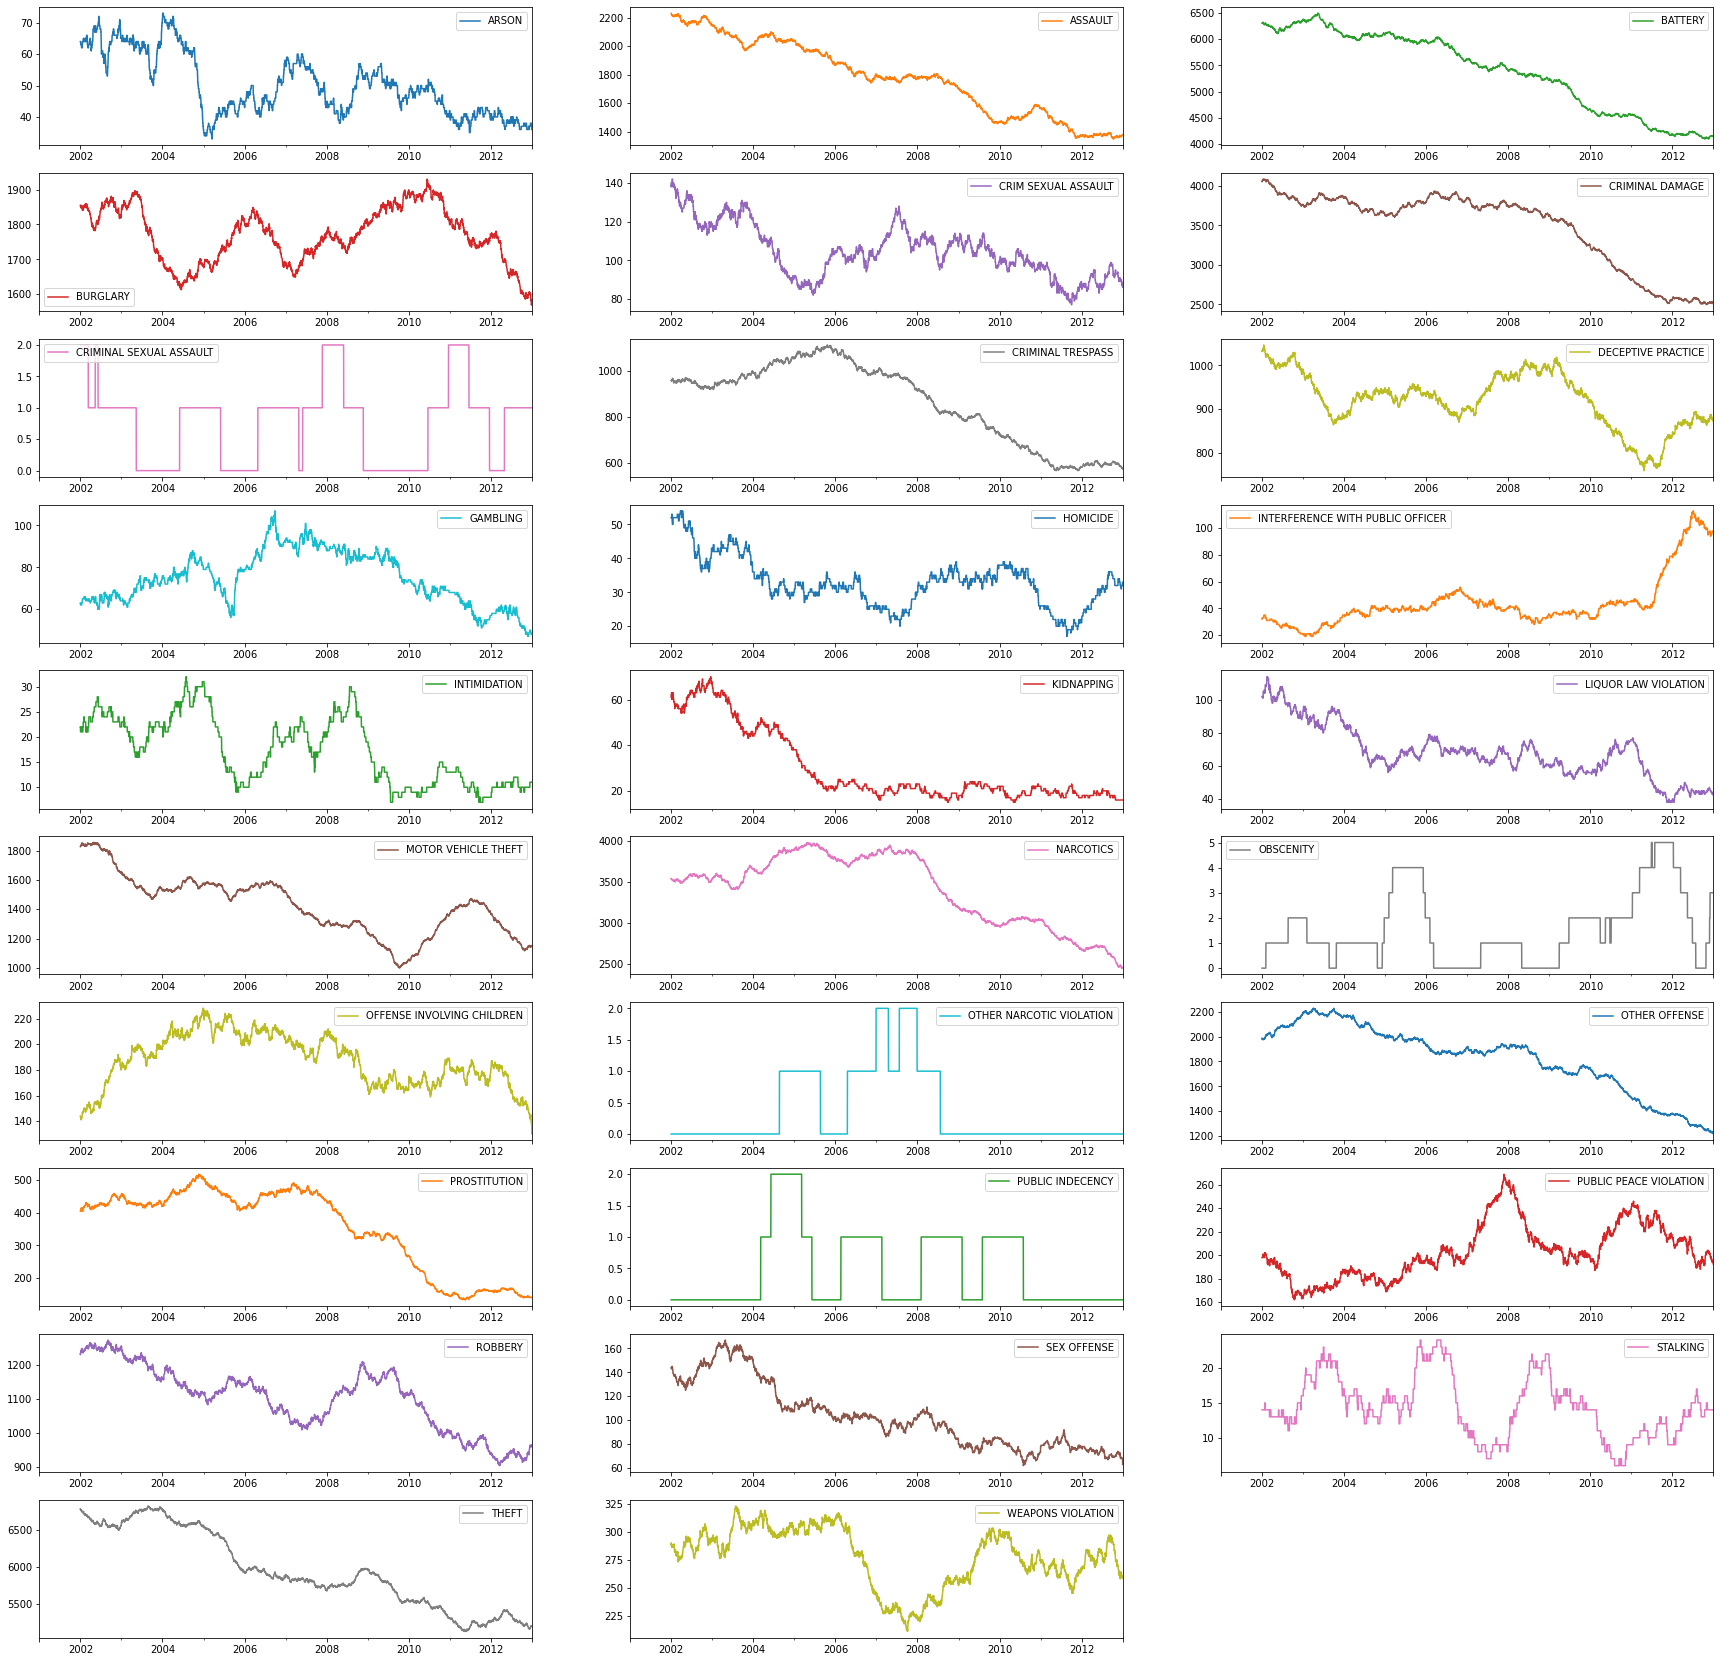

In [ ]:
crimes_count_date = df1.pivot_table('unique_key', aggfunc=np.size, columns='primary_type', index=df1.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(30, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)





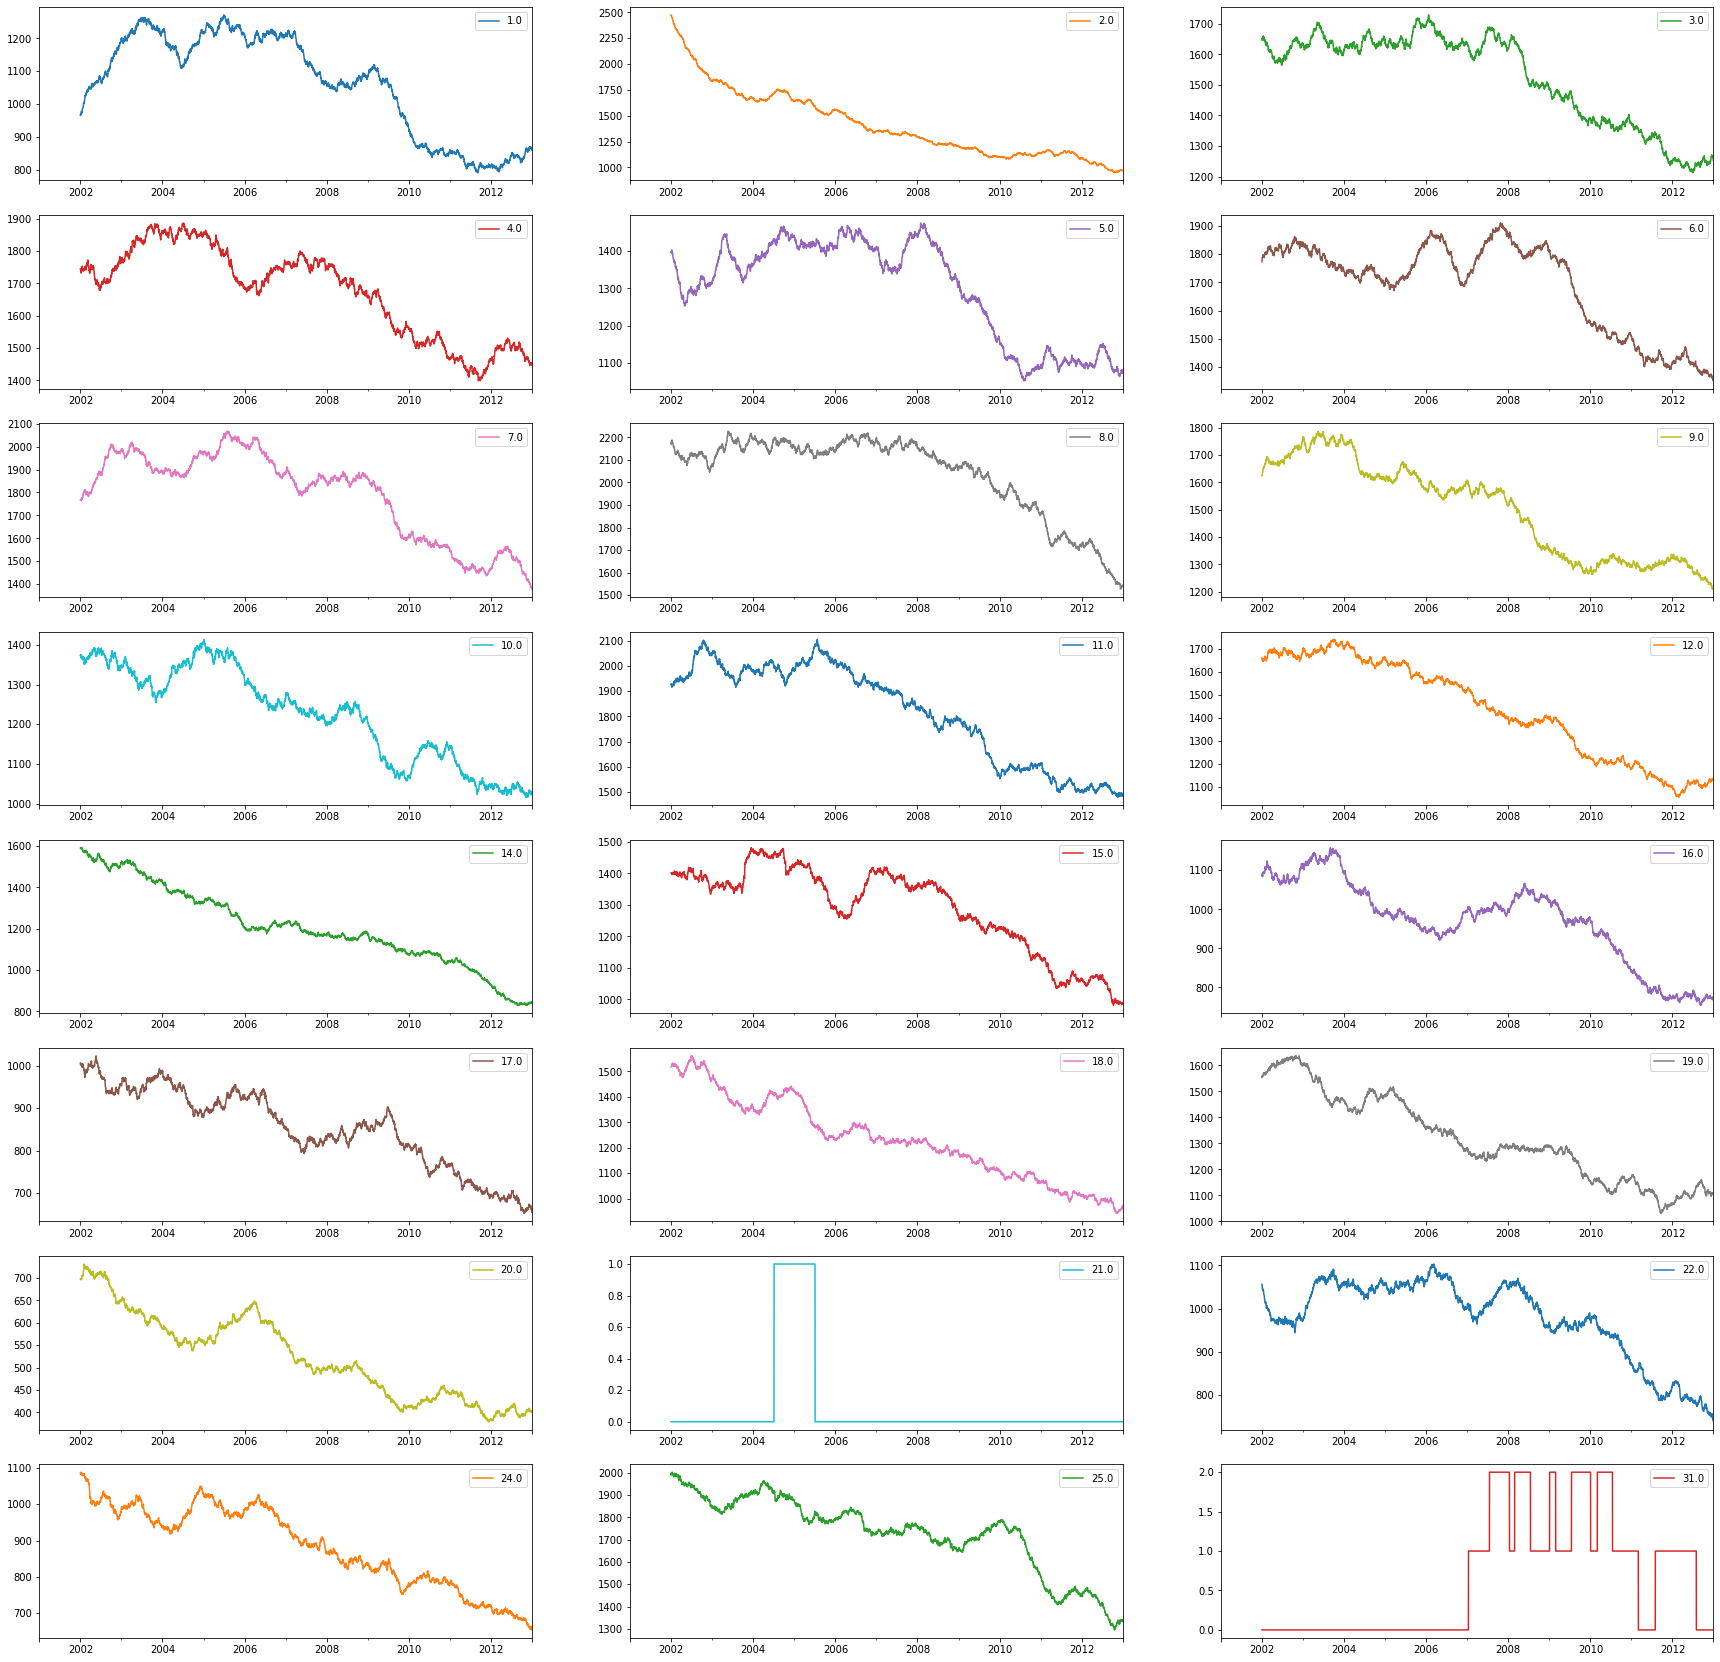

In [ ]:
crimes_count_date = df1.pivot_table('domestic', aggfunc=np.size, columns='district', index=df1.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(30, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
df1.dtypes

unique_key                   int64
date                        object
month                        int64
day                          int64
year                         int64
time                        object
DateTime            datetime64[ns]
primary_type              category
domestic                      bool
arrest                        bool
Updated_duration            object
dtype: object

In [ ]:
df1.loc[df1['month'] == 1, 'season'] = 'winter'  
df1.loc[df1['month'] == 2, 'season'] = 'winter'  
df1.loc[df1['month'] == 3, 'season'] = 'spring'  
df1.loc[df1['month'] == 4, 'season'] = 'spring'  
df1.loc[df1['month'] == 5, 'season'] = 'spring'  
df1.loc[df1['month'] == 6, 'season'] = 'summer'  
df1.loc[df1['month'] == 7, 'season'] = 'summer'  
df1.loc[df1['month'] == 8, 'season'] = 'summer'  
df1.loc[df1['month'] == 9, 'season'] = 'fall'  
df1.loc[df1['month'] == 10, 'season'] = 'fall'  
df1.loc[df1['month'] == 11, 'season'] = 'fall'  
df1.loc[df1['month'] == 12, 'season'] = 'winter'  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
df1

,unique_key,date,month,day,year,time,DateTime,primary_type,domestic,arrest,Updated_duration,season
date,,,,,,,,,,,,
2008-07-27,6392722,2008-07-27,7,27,2008,00:00:00,2008-07-27,BATTERY,True,False,15:56:25+00:00,summer
2001-01-25,1350624,2001-01-25,1,25,2001,00:00:00,2001-01-25,BURGLARY,False,False,15:03:40+00:00,winter
2001-05-16,1533391,2001-05-16,5,16,2001,00:00:00,2001-05-16,THEFT,False,False,15:03:40+00:00,spring
2005-11-11,4434007,2005-11-11,11,11,2005,00:00:00,2005-11-11,THEFT,False,False,15:56:25+00:00,fall
2002-08-12,2290743,2002-08-12,8,12,2002,00:00:00,2002-08-12,BURGLARY,False,False,15:56:25+00:00,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-08-19,5729277,2007-08-19,8,19,2007,00:00:00,2007-08-19,ASSAULT,True,False,15:56:25+00:00,summer
2008-03-09,6122276,2008-03-09,3,9,2008,00:00:00,2008-03-09,ASSAULT,False,False,15:56:25+00:00,spring
2001-10-23,1811814,2001-10-23,10,23,2001,00:00:00,2001-10-23,ASSAULT,False,False,15:03:40+00:00,fall


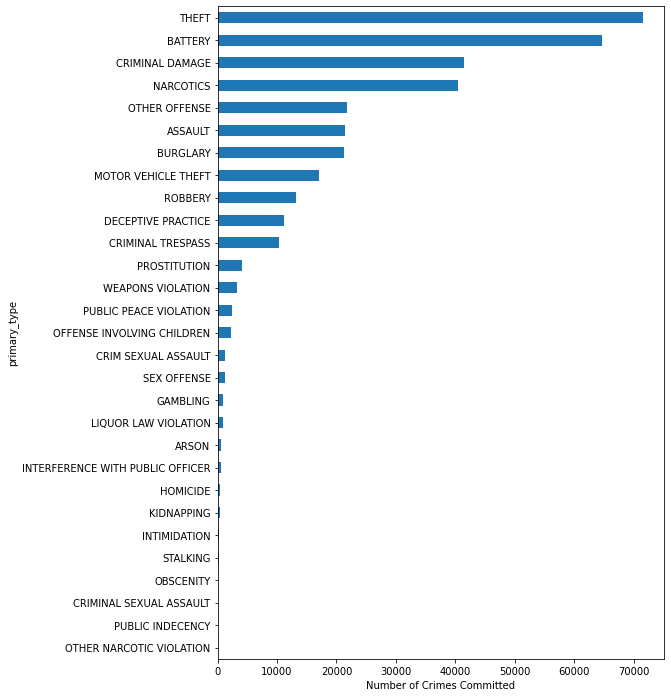

In [ ]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
df1.groupby(df1['primary_type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

In [ ]:
df['primary_type'] = pd.Categorical(df['primary_type'])
df['description'] = pd.Categorical(df['description'])
df['location_description'] = pd.Categorical(df['location_description'])



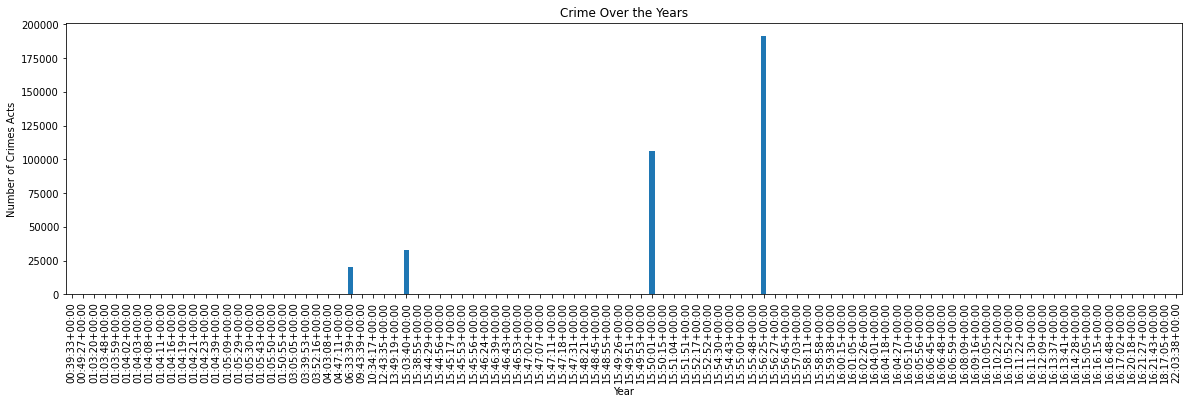

In [ ]:
plt.figure(figsize = (20,5))
x=df1.groupby([df1.Updated_duration]).size().plot.bar()
plt.title('Crime Over the Period of Duration')
plt.xlabel('Duration')
plt.ylabel('Number of Crimes Acts')
plt.show()

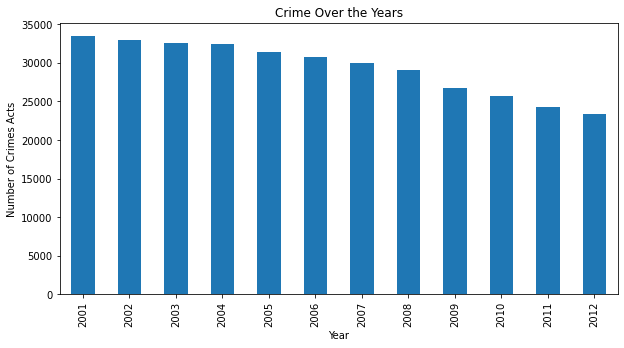

In [ ]:
plt.figure(figsize = (10,5))
x=df1.groupby([df1.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

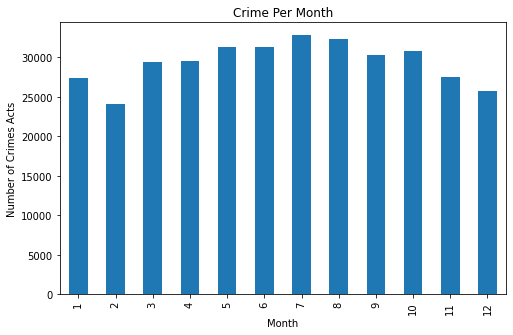

In [ ]:
plt.figure(figsize = (8,5))
#make graph of crimes per month
df1.groupby([df1.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()

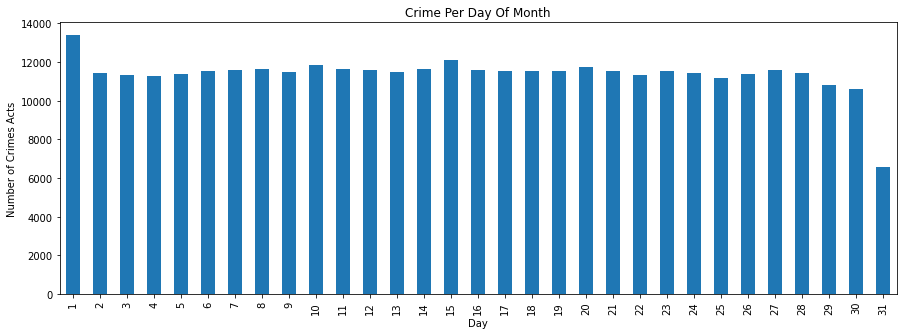

In [ ]:
plt.figure(figsize = (15,5))
df1.groupby([df1.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

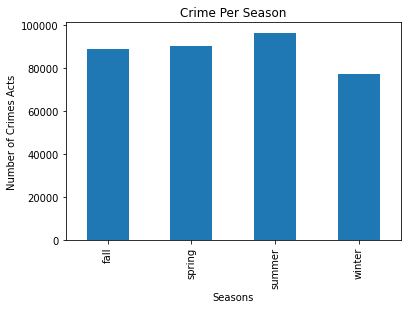

In [ ]:
df1.groupby([df1.season]).size().plot.bar()
plt.title('Crime Per Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [ ]:
#Crime_Data_district = df.pivot_table('arrest', aggfunc = np.sum, columns = ['district'], index = df1.date, fill_value = 0)
#Crime_Data_ward = df.pivot_table('arrest', aggfunc = np.sum, columns = ['ward'], index = df1.date, fill_value = 0)
#Crime_Data_ca = df.pivot_table('arrest', aggfunc = np.sum, columns = ['community_area'], index = df1.date, fill_value = 0)

In [ ]:
arrest_per_year = df.groupby('month')['domestic'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,domestic,Counts,Percentage
month,,,
1,False,24026,87.650943
1,True,3385,12.349057
2,False,21049,87.278683
2,True,3068,12.721317
3,False,25659,87.228039
3,True,3757,12.771961
4,False,25670,87.008101
4,True,3833,12.991899
5,False,27375,87.471242


In [ ]:
arrest_per_year = df.groupby('year')['domestic'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,domestic,Counts,Percentage
year,,,
2001,False,29517,88.034239
2001,True,4012,11.965761
2002,False,28821,87.323133
2002,True,4184,12.676867
2003,False,28835,88.603122
2003,True,3709,11.396878
2004,False,28607,88.320469
2004,True,3783,11.679531
2005,False,27894,88.741132


In [ ]:
arrest_per_year = df.groupby('season')['domestic'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,domestic,Counts,Percentage
season,,,
fall,False,78303,88.338222
fall,True,10337,11.661778
spring,False,78704,87.240481
spring,True,11511,12.759519
summer,False,84147,87.245977
summer,True,12301,12.754023
winter,False,67694,87.598023
winter,True,9584,12.401977


In [ ]:
arrest_per_year = df.groupby('month')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,arrest,Counts,Percentage
month,,,
1,False,18942,69.103645
1,True,8469,30.896355
2,False,16394,67.976946
2,True,7723,32.023054
3,False,20375,69.265026
3,True,9041,30.734974
4,False,20893,70.816527
4,True,8610,29.183473
5,False,22341,71.386120


In [ ]:
arrest_per_year = df.groupby('year')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,arrest,Counts,Percentage
year,,,
2001,False,23688,70.649289
2001,True,9841,29.350711
2002,False,23419,70.955916
2002,True,9586,29.044084
2003,False,22917,70.418510
2003,True,9627,29.581490
2004,False,22495,69.450448
2004,True,9895,30.549552
2005,False,21696,69.023001


In [ ]:
arrest_per_year = df.groupby('season')['arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,arrest,Counts,Percentage
season,,,
fall,False,63561,71.706904
fall,True,25079,28.293096
spring,False,63609,70.508230
spring,True,26606,29.491770
summer,False,69762,72.331204
summer,True,26686,27.668796
winter,False,53684,69.468672
winter,True,23594,30.531328


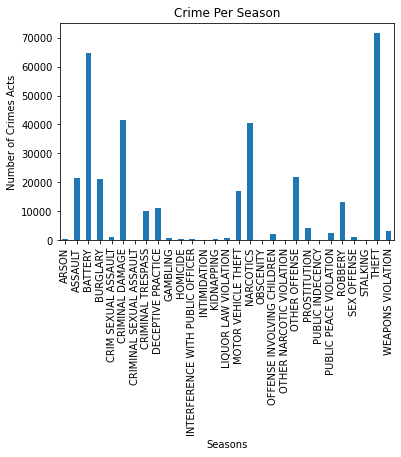

In [ ]:

df1.groupby([df1.primary_type]).size().plot.bar()
plt.title('Crime Per Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Crimes Acts')
plt.show()




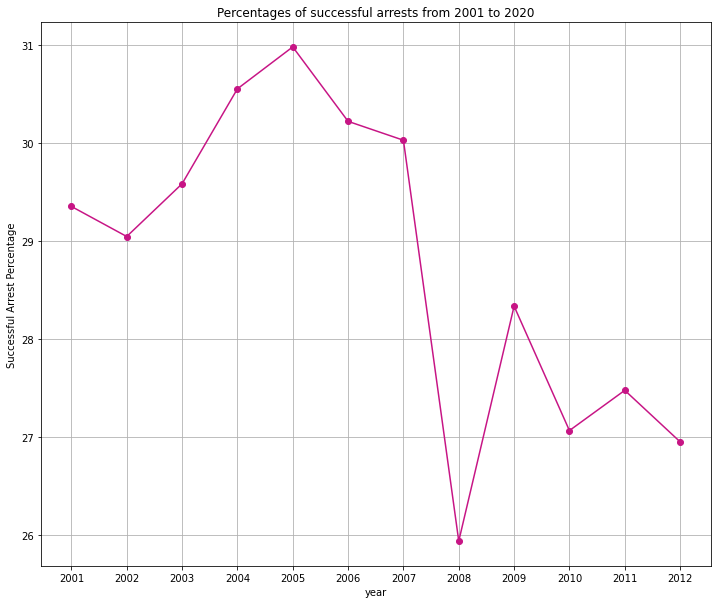

In [ ]:

## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2020')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')


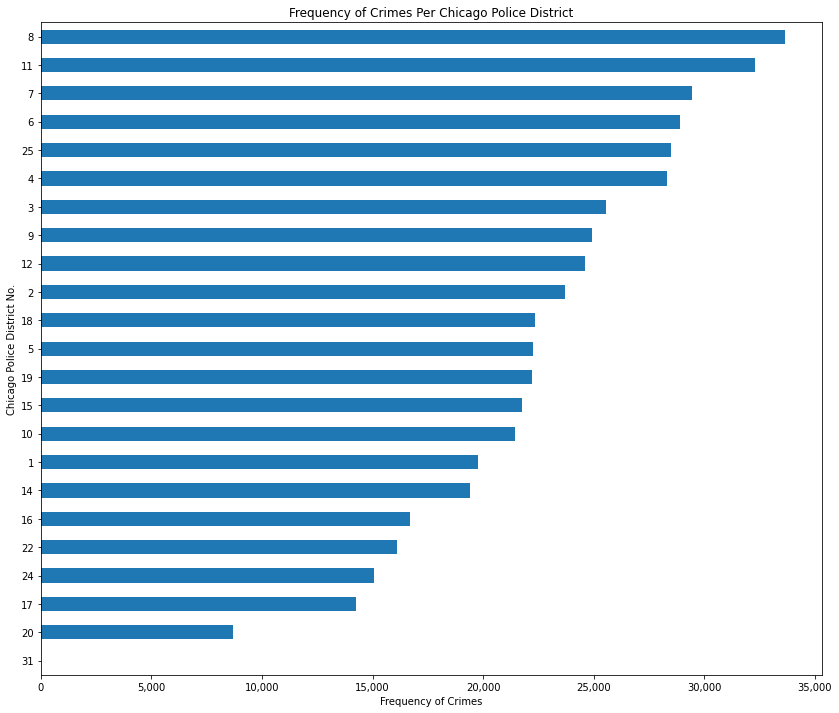

In [ ]:
# calculating total number of incidents per district
district_crime = df['district'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

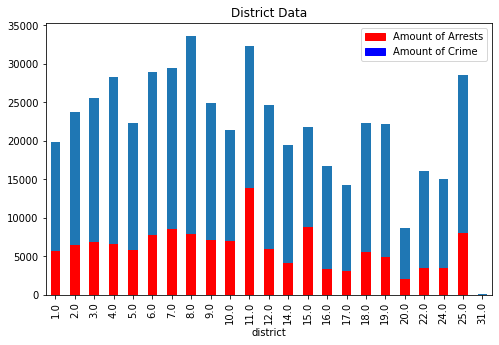

In [ ]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')


#crime per district
plt.figure(figsize = (8,5))
#plt.hold(True)
df.groupby(df['district']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[red, blue])
#plt.hold(False)



In [ ]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('data(1).csv') 
df['DateTime'] = pd.to_datetime(df['date'])


series = df1.loc[:, 'year'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

KeyError: ignored

In [ ]:
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

In [ ]:
df1['month']= pd.to_datetime(df1['month'], infer_datetime_format=True)
indexeddataset= df1.set_index(['month'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
indexeddataset.head(5)

,date,day,year,time,case_number,DateTime,primary_type,domestic,season
month,,,,,,,,,
1970-01-01 00:00:00.000000009,2005-09-22,22,2005,19:55:41,HL629300,2005-09-22 19:55:41+00:00,CRIMINAL TRESPASS,False,fall
1970-01-01 00:00:00.000000012,2015-12-17,17,2015,00:01:00,HY540220,2015-12-17 00:01:00+00:00,MOTOR VEHICLE THEFT,False,winter
1970-01-01 00:00:00.000000003,2008-03-18,18,2008,17:00:00,HP312801,2008-03-18 17:00:00+00:00,DECEPTIVE PRACTICE,False,spring
1970-01-01 00:00:00.000000011,2009-11-08,8,2009,18:00:00,HR633143,2009-11-08 18:00:00+00:00,ROBBERY,False,fall
1970-01-01 00:00:00.000000005,2004-05-08,8,2004,03:30:00,HK350115,2004-05-08 03:30:00+00:00,CRIMINAL TRESPASS,False,spring


In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [ ]:
class StationarityTests:
  def __init__(self, significance=.05):
    self.SignificanceLevel = significance
    self.pValue = None
    self.isStationary = None

In [ ]:
def ADF_Stationarity_Test(self, timeseries, printResults = True):

  #Dickey-Fuller test:
  adfTest = adfuller(timeseries, autolag='AIC')
  self.pValue = adfTest[1]
  if (self.pValue<self.SignificanceLevel):
      self.isStationary = True
  else:
      self.isStationary = False

  if printResults:
      dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

      #Add Critical Values
      for key,value in adfTest[4].items():
        dfResults['Critical Value (%s)'%key] = value

      print('Augmented Dickey-Fuller Test Results:')
      print(dfResults)

In [ ]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(x, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

AttributeError: ignored